# Projet de mod√©lisation statistique - Graphes bipartis

In [1]:
import numpy as np
import random as rd
from numpy.random import permutation
import networkx as nx
from networkx.algorithms import bipartite
import time
from random import seed
import tqdm as tqdm

from benchmark import main4
from benchmark import main3
from benchmark import main2

import matplotlib.pyplot as plt
from IPython.display import HTML, display


## I - Pr√©sentation

### 1) Graphe biparti

Un graphe biparti est compos√© de deux parties : un ensemble de ressources $U$ et un ensemble de demandes $V$. Ces deux parties sont compos√©es de sommets contenant chacun une ou plusieurs demi-ar√™tes disponibles qui d√©finissent le degr√© du sommet. Une demi-ar√™te dans $U$ peut √™tre reli√©e √† une demi-ar√™te dans $V$ pour former une ar√™te. On d√©finit alors un graphe biparti par le couple $(U \cup V, \mathcal{E})$ o√π $\mathcal{E} \subset U \times V$ est un ensemble d'ar√™tes.

Le graphe biparti trouve de nombreuses applications, par exemple dans le cas de campagnes de publicit√©.

L'objectif est de trouver l'allocation optimale. Pour cela, il convient de definir la notion de match. Un match $M$ est un sous-ensemble d'ar√™tes de $\mathcal{E}$ tel que chaque sommet $v \in V$ soit le point d'arriv√©e d'au plus une ar√™te. On peut d√©finir la qualit√© d'un match comme la quantit√© d'ar√™tes qu'il contient, c'est √† dire $\lvert M \rvert$. Pour un graphe biparti donn√©, on note $M^*$ le match (ou l'un des matchs) atteignant le cardinal le plus √©lev√©.

Des algorithmes peuvent alors √™tre impl√©ment√©s et leurs r√©sultats peuvent √™tre √©valu√©s. Pour un match $M$ obtenu, on d√©finit le ratio de comp√©titivit√© par $\frac{\lvert M \rvert}{\lvert M^* \rvert}$.

Pour ce projet, nous allons impl√©menter et √©tudier le comportement de deux algorithmes tr√®s classiques : Greedy et Ranking.

### 2) Algorithme greedy

L'algorithme greedy est l'algorithme le plus simple. Son principe est le suivant :
- On consid√®re $d^U$ une liste de taille $N$ contenant la capacit√© des $N$ sommets de $U$. De m√™me avec $d^V$ liste de taille $T$ qui contient la capacit√© des $T$ sommets de $V$.
- Pour chaque sommet $v$ de $V$, pour chaque demi-ar√™te de $v$, on s√©letionne au hasard une demi-ar√™te $e_i^U$ d'un sommet de $U$ qui n'a pas d√©j√† √©t√© appari√©e.
- Si $v$ n'a pas encore √©t√© appari√©e et si le sommet de la demi-ar√™te $e_i^U$ n'a pas non plus √©t√© apari√©, alors on aparie ces deux sommets (donc on cr√©e une ar√™te) et on rentre cet appariement dans l'ensemble des appariement trouv√©s $M$.

Ainsi cet algorithme permet d'obtenir un match $M$. Voici un pseudo-code de cet algorithme (Noiry & al.) :

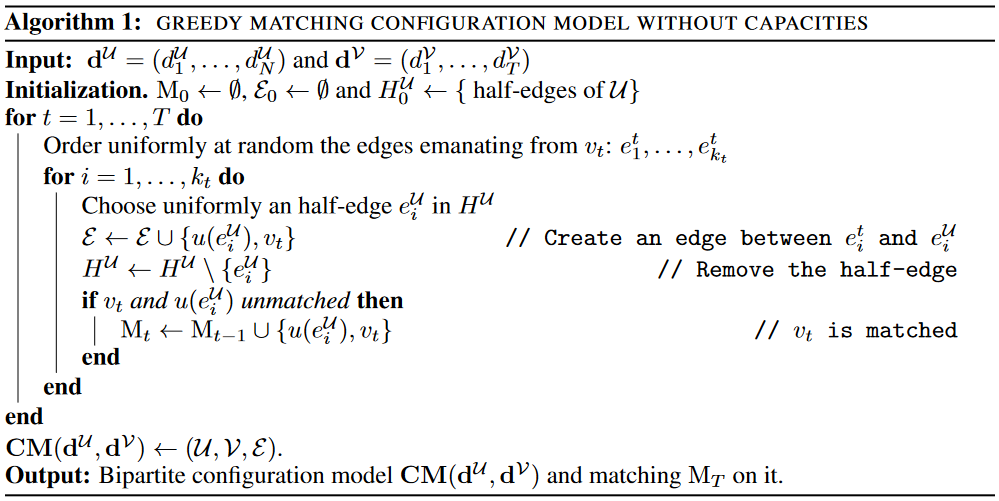

Voici son code:

In [2]:
def gready(d_U,d_V, affichage = False):
    #input :  two sequences5 of nonnegative integers
    #d_U de taille N = degr√©s des sommet de U c'est √† dire le nombre de demi arrete que comporte chaque somment de U
    #d_V de taille T = degr√©s des sommets de V
    N=len(d_U)
    T=len(d_V)
    M=[]
    eps=[]
    #H0=half edges de U
    H=d_U[:]
    ##### Pour le trac√© #####
    U=["L"+str(i) for i in range(len(d_U))]
    V=["R"+str(i) for i in range(len(d_V))]
    G = nx.Graph()
    G.add_nodes_from(U, bipartite=0)
    G.add_nodes_from(V,bipartite=1)
    ########################
    for t in range(T): #attention aux indices
        #Pt=permutation(np.arrange(d_V[t]))
        #on consid√®re que les aretes d'un meme sommet sont interchangeables   
        for i in range(d_V[t]):
            nb_aretes_dispo=np.sum(H)
            #sert √† selectionner une demi-arete uniform√©ment dans les demi-aretes encore dispo de U
            if nb_aretes_dispo>0:
                curseur = rd.randrange(1,nb_aretes_dispo+1)
                res=0
                i=0
                while res<curseur:
                    res+=H[i]
                    i+=1
                i-=1 #c'est le sommet de la demi arrete encore dispo de U qu'on selectionne 
                eps.append(("L"+str(i),"R"+str(t)))#on rajoute la nouvelle arete a la liste des aretes 
                H[i]-=1 #on rend la demi-arete de U indisponible
                if "L"+str(i) not in M :
                    if "R"+str(t) not in M:
                        M.append("L"+str(i))
                        M.append("R"+str(t))
                G.add_edges_from(eps)
                if affichage :
                    nx.draw_networkx(G, pos = nx.drawing.layout.bipartite_layout(G, U), width = 2)
    return (eps,M)

### 3) Algorithme ranking

L'algorithme ranking est l√©g√®rement plus sophistiqu√© que le pr√©c√©dant et le surperforme en g√©n√©ral. Voici son fonctionnement :
- On consid√®re $d^L$ une liste de taille $N$ contenant la capacit√© des $N$ sommets de $U$. De m√™me avec $d^R$ liste de taille $T$ qui contient la capacit√© des $T$ sommets de $V$.
- On associe une valeur al√©atoire $Y_i$ tir√©e dans $[0, 1]$ pour chaque sommet $i$ de $U$.
- Pour chaque sommet $v$ de $V$, on consid√®re tous les sommets de $U$ qui n'ont jamaise √©t√© appari√©s. Pour chaque sommet $i$ de $U$, on calcule $v_i(1-g(Y_i))$ avec $v_i$ le nombre de demi-ar√™tes du sommet $i$ et $g$ la fonction d√©finie par $g(y) = e^{y-1}$.
- Le sommet $i$ qui obtient la valeur la plus importante est appari√© √† $v$ et on ajoute cet appariement √† $M$ (comme pour l'algorithme greedy.

Ce fonctionnement est d√©taill√© dans le pseudo code ci-dessous (Devanur & al.) :

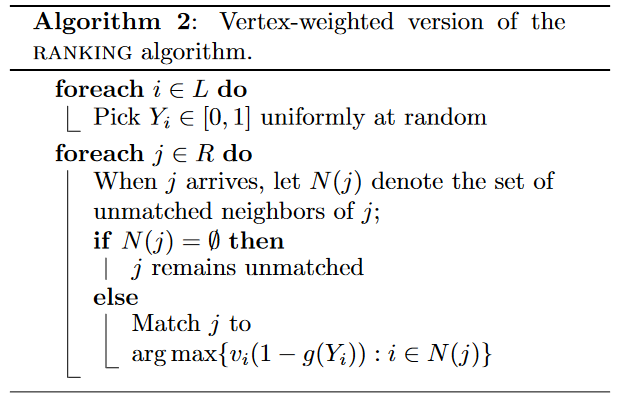

Voici son code :

In [3]:
def ranking(d_L,d_R, affichage = False):
    #input :  two sequences5 of nonnegative integers
    #d_U de taille N = degr√©s des sommet de U c'est √† dire le nombre de demi arrete que comporte chaque somment de U
    #d_V de taille T = degr√©s des sommets de V
    N=len(d_L)
    T=len(d_R)
    L = [rd.random() for i in range(N)]
    M=[]
    eps=[]
    H=d_L[:]
    ##### Pour le trac√© #####
    U=["L"+str(i) for i in range(len(d_L))]
    V=["R"+str(i) for i in range(len(d_R))]
    G = nx.Graph()
    G.add_nodes_from(U, bipartite=0)
    G.add_nodes_from(V,bipartite=1)
    ########################
    for t in range(T): #attention aux indices
        #on consid√®re que les aretes d'un meme sommet sont interchangeables
        nb_aretes_dispo=np.sum(H)
        if nb_aretes_dispo>0:
            res=0
            curseur = 0
            for j in range (len(H)): #On d√©termine √† quel sommet on rattache le sommet t
                a = H[j]*(1-np.exp(L[j]-1))
                if a>res:
                    res = a
                    curseur = j
            eps.append(("L"+str(curseur),"R"+str(t)))#on rajoute la nouvelle arete a la liste des aretes
            H[curseur]-=1 #on rend la demi-arete de L indisponible
            if "L"+str(curseur) not in M:
                if "R"+str(t) not in M:
                    M.append("L"+str(curseur))
                    M.append("R"+str(t))
    G.add_edges_from(eps)
    if affichage:
        nx.draw_networkx(G, pos = nx.drawing.layout.bipartite_layout(G, U), width = 2)
    return (eps,M)

In [4]:
d_U=[2,3,1,3]
d_V=[2,1,2]

#d_U=[2,1,2,1]
#d_V=[2,4,3]

#U=["L"+str(i) for i in range(len(d_U))]
#V=["R"+str(i) for i in range(len(d_V))]


#test = ranking([rd.randint(1, 3) for x in range(2)],[rd.randint(1, 3) for x in range(3)])
test = ranking(d_U,d_V)
print(test)

([('L1', 'R0'), ('L2', 'R1'), ('L1', 'R2')], ['L1', 'R0', 'L2', 'R1'])


## II - √âtude du comportement des algorithmes

### II-1) √âtude du ratio de comp√©titivit√© 

On va maintenant comparer nos deux algorithmes sur diff√©rents indicateurs de performance. On peut en effet juger de la qualit√© d'un matching dans un graphe bipartite en √©valuant le ratio de comp√©titivit√© d√©fini plus haut. Ici nous √©tudierons une version simplifi√©e du ratio de comp√©titivit√© en s'int√©ressant plut√¥t au nombre de matching r√©alis√©s par notre algorithme divis√© par le nombre de sommet dans notre graphe : $\frac{\lvert M \rvert}{\lvert n+m \rvert}$
avec : 
- $M$ le nombre de matching r√©alis√© par notre algorithme (ie le nombre de sommets qui est au moins reli√© √† un autre sommet)
- $n$ le nombre de sommets √† gauche dans notre graphe bipartite 
- $m$ le nombre sommets √† droite dans notre graphe bipartite

On va donc comparer dans un premier temps nos graphes en √©tudiant l'√©volution du ratio de comp√©titivit√© modifi√© en faisant varier tant√¥t la taille du graphe tant√¥t la capacit√© de chaque sommet (ie le param√®tre $d$: le nombre de demi arr√™tes que contiennent les sommets).


#### II-1-a) Ratio de comp√©titivit√© en fonction de la capacit√© 

In [5]:
#main4()

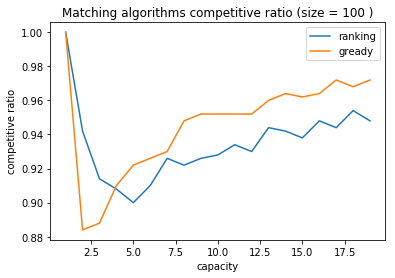

Ici on va donc faire tourner le code sur un d-graphe r√©gulier de taille (100,100). Pour chaque capacit√© (prise entre $d=1$ et $d=9$ ici) on fait tourner 10 fois le code et on prend la moyenne des ratios de comp√©titivit√© obtenus. 

On constate un premier r√©sultat qui peut sembler √©tonnant : Greedy est meilleur que ranking en terme de ratio de comp√©titivit√© √† partir d'une certaine capacit√© vers $d=4$.

#### II-1-b) Ratio de comp√©titivit√© en fonction de la taille du graphe

In [6]:
#main3()

A|B
-|-
![alt](Images/Image1.png)|![alt](Images/Image2.png)


Pour tester nous avons ici tracer le ratio de comp√©titivit√© en fonction de la taille des d-graphes (en faisant varier le nombre de sommets des deux c√¥t√©s en m√™me temps) √† capacit√© fix√©e dans les deux cas suivants : 

- $d=10$ dans le premier cas. Cela signifie que chaque sommet du graphe aura 10 demi arr√™tes au maximum. Avec les r√©sultats de la partie pr√©c√©dente, on aurait intuit√© que greedy serait meilleur dans ce cas-ci peu importe la taille du graphe. Ce r√©sultat se confirme pour des tailles √† partir de (20,20). Pour des tailles plus petites, les algorithmes proposent des matchings de qualit√© comparable. 
- $d=2$ dans le deuxi√®me cas. Avec les r√©sultats de la partie pr√©c√©dente on aurait intuit√© que ranking serait meilleur dans ce cas et c'est bien ce que l'on retrouve ici. 

### II-2) √âtude annexe du temps d'ex√©cution

Tout en ayant conscience que le temps d'ex√©cution des algorithmes d√©pend fortement de la mani√®re dont on impl√©mente les dits algorithmes, nous avons voulu par curiosit√© comparer nos deux algorithmes sur ce crit√®re. En effet un algorithme qui est tr√®s couteux en temps n'est pas souhaitable. 

#### II-2-a) Temps d'ex√©cution en fonction de la capacit√©

In [7]:
#main2()

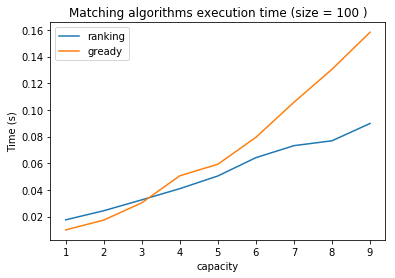

Ici on va donc faire tourner le code sur un d-graphe r√©gulier de taille (100,100). Pour chaque capacit√© (prise entre  ùëë=1  et  ùëë=9  ici) on fait tourner 10 fois le code et on prend la moyenne des temps d'ex√©cutions obtenus.

On constate que Ranking est meilleur que Greedy en terme de temps d'ex√©cution √† partir d'une certaine capacit√© vers  ùëë=3. Cela semble assez coh√©rent avec le fait que Greedy soit un algorithme co√ªteux puisqu'il parcourt l'ensemble des demi-ar√™tes du sous-graphe de gauche √† chaque fois qu'un nouveau sommet arrive √† droite pour en s√©lectionner une au hasard. D'un autre c√¥t√© ranking parcourt seulement les sommets disponnibles √† gauche et les tri. 

#### II-2-b) Temps d'ex√©cution en fonction de la capacit√©

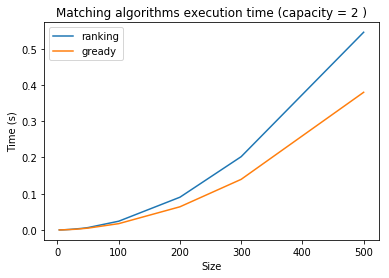

Ici on va donc faire tourner le code sur un 2-graphe r√©gulier de taille (n,n) pour n variant entre 0 et 500. Pour chaque taille de graphe on fait tourner 10 fois le code et on prend la moyenne des temps d'ex√©cutions obtenus.
Contrairement √† pr√©c√©dement ici c'est Greedy qui semble meilleur que Ranking. 